# Exploratory data analysis for $D^0\to \gamma\gamma$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize

from pdflib import normal, double_normal, exp_gauss_exp, exp_double_gauss_exp
from llhlib import loglh_maker, normalize
from plotlib import poisson_hist, fit_plot, plot_scatter

In [2]:
import glob

In [3]:
matplotlib.rcParams['font.size'] = 18

In [4]:
files = sorted(glob.glob('./csv/*.csv'))
print('\n'.join(files))

./csv\taumuthr.csv
./csv\tup.csv
./csv\tupd0gamgam.csv
./csv\tupdbltau.csv
./csv\tupdpkpipi.csv
./csv\tupfulldkpidgg.csv


In [5]:
df = pd.read_csv(files[2])
df.shape

(41198, 19)

In [6]:
df.head()

,Unnamed: 0,evtn,D0_gamma0_p,D0_gamma_p,D0_gamma0_pt,D0_gamma_pt,D0_gamma0_costh,D0_gamma_costh,D0_gamma0_px_mc,D0_gamma_px_mc,D0_gamma0_py_mc,D0_gamma_py_mc,D0_gamma0_pz_mc,D0_gamma_pz_mc,D0_gamma0_pdgid_mc,D0_gamma_pdgid_mc,M,p,pt
0,0,0,0.830138,1.075409,0.798465,1.044341,-0.273590,0.238630,-0.342736,0.283937,-0.714329,0.992323,-0.225363,0.253628,22.0,22.0,1.883114,0.291535,0.290038
1,2,1,0.861937,0.992600,0.801081,0.983444,0.369083,-0.135515,0.794437,-0.980063,0.227054,-0.127779,0.328121,-0.135184,22.0,22.0,1.831650,0.290460,0.225061
2,4,2,1.003727,0.915522,1.001196,0.888250,-0.070970,0.242258,-0.997886,0.842989,0.024641,0.167522,-0.071021,0.214607,22.0,22.0,1.898655,0.280405,0.236557
3,6,3,1.020853,0.843872,0.776934,0.489938,-0.648678,0.814201,-0.474375,0.316574,0.621314,-0.385700,-0.666272,0.699767,22.0,22.0,1.842211,0.288890,0.287816
4,8,4,1.034493,0.856217,0.956107,0.772510,-0.381842,0.431240,0.890265,-0.772132,-0.329737,0.070674,-0.392228,0.370597,22.0,22.0,1.868006,0.292122,0.290983


In [8]:
df.columns

Index(['Unnamed: 0', 'evtn', 'D0_gamma0_p', 'D0_gamma_p', 'D0_gamma0_pt',
       'D0_gamma_pt', 'D0_gamma0_costh', 'D0_gamma_costh', 'D0_gamma0_px_mc',
       'D0_gamma_px_mc', 'D0_gamma0_py_mc', 'D0_gamma_py_mc',
       'D0_gamma0_pz_mc', 'D0_gamma_pz_mc', 'D0_gamma0_pdgid_mc',
       'D0_gamma_pdgid_mc', 'M', 'p', 'pt'],
      dtype='object')

In [9]:
df = df[df.M > 1.75]

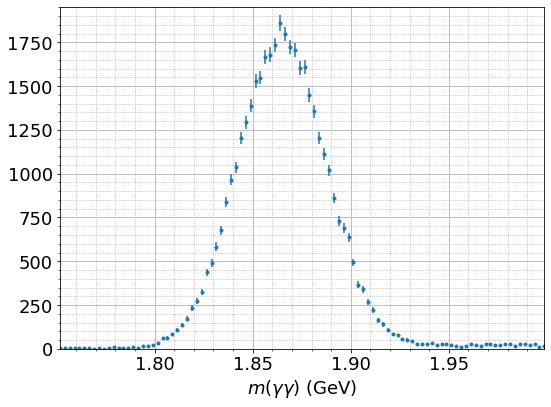

In [10]:
poisson_hist(df.M, xlabel=r'$m(\gamma\gamma)$ (GeV)');

In [11]:
ebeam = 0.5 * 3.77313
df['E'] = np.sqrt(df.M**2 + df.p**2)
df['deltaE'] = df.E - ebeam
df['Mbc'] = np.sqrt(ebeam**2 - df.p**2)

In [12]:
df[['M', 'Mbc', 'deltaE']].describe()

,M,Mbc,deltaE
count,41103.000000,41103.000000,41103.000000
mean,1.866265,1.864163,0.002027
std,0.025850,0.011104,0.027052
min,1.750445,1.116495,-0.120115
25%,1.849774,1.863665,-0.014826
50%,1.865193,1.864766,0.000576
75%,1.880842,1.865752,0.016194
max,1.999902,1.881388,0.522433


In [35]:
df.shape[0] / 50e3

0.8169

In [16]:
df = df[(df.deltaE < 0.15) & (df.Mbc > 1.85)]

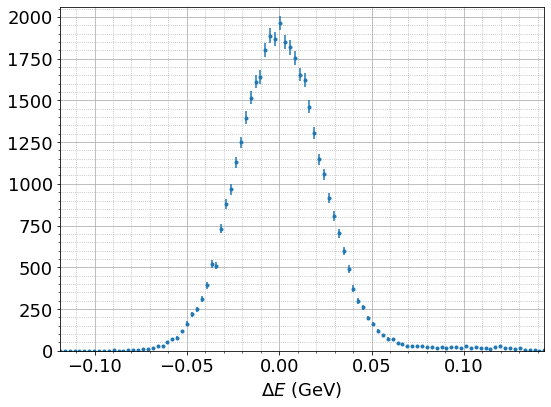

In [17]:
poisson_hist(df.deltaE, xlabel=r'$\Delta E$ (GeV)');

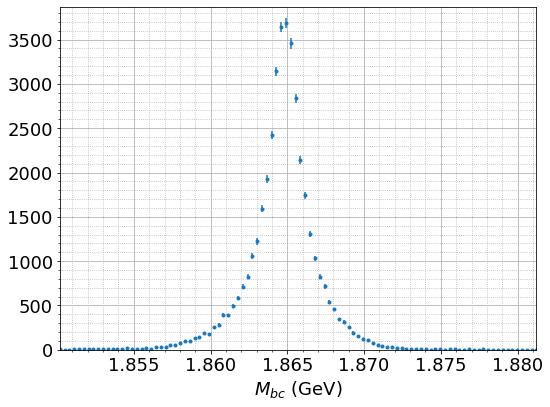

In [18]:
poisson_hist(df.Mbc, xlabel=r'$M_{bc}$ (GeV)');

In [19]:
fcn2 = loglh_maker(double_normal, df.M)

In [20]:
bounds2 = [(1.85, 1.87), (0.01, 0.026), (0.026, 0.10), (0.0, 1.0)]
fitres2 = minimize(fcn2, [1.865, 0.02, 0.3, 0.5], bounds=bounds2)
fitres2.x

array([1.86515936, 0.02189254, 0.05924369, 0.95282985])

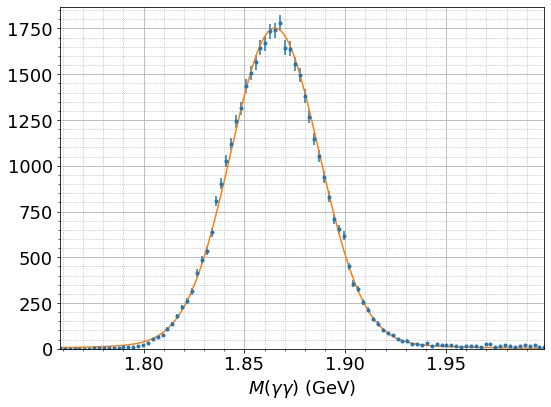

In [22]:
fit_plot(double_normal, fitres2.x, df.M, xlabel=r'$M(\gamma\gamma)$ (GeV)');
plt.savefig('plots/mass_dngamgam.png')

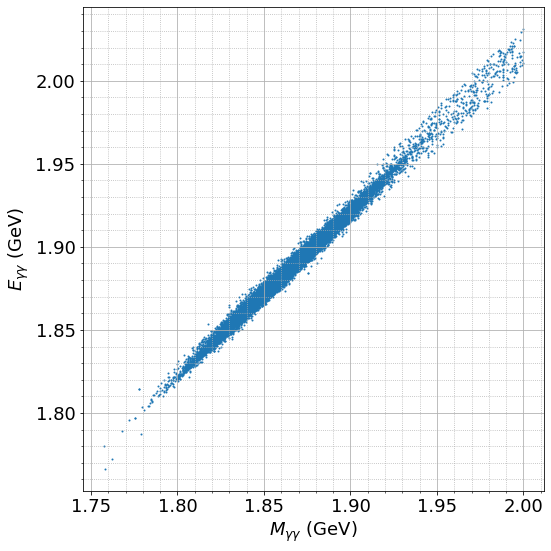

In [33]:
plot_scatter(df.M, df.E, r'$M_{\gamma\gamma}$ (GeV)', r'$E_{\gamma\gamma}$ (GeV)')
plt.savefig('plots/e_vs_m_dngamgam.png')

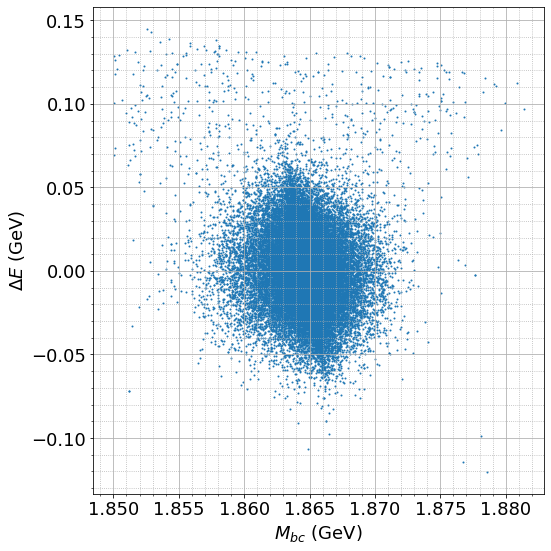

In [34]:
plot_scatter(df.Mbc, df.deltaE, r'$M_{bc}$ (GeV)', r'$\Delta E$ (GeV)')
plt.savefig('plots/deltae_vs_mbc_dngamgam.png')

In [23]:
fcn3 = loglh_maker(double_normal, df.deltaE)

In [24]:
bounds3 = [(-0.02, 0.02), (0.01, 0.026), (0.026, 0.10), (0.0, 1.0)]
fitres3 = minimize(fcn3, [0., 0.02, 0.3, 0.5], bounds=bounds3)
fitres3.x

array([4.62126992e-04, 2.18318336e-02, 5.87503680e-02, 9.51714979e-01])

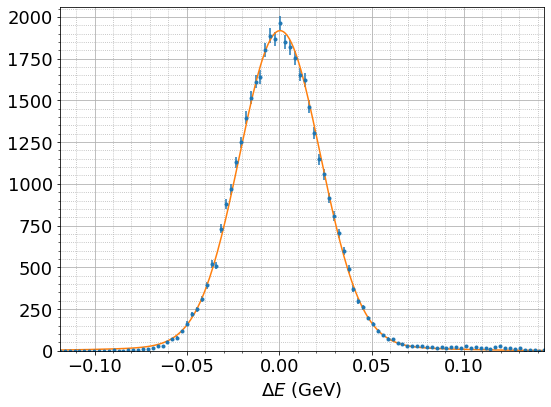

In [26]:
fit_plot(double_normal, fitres3.x, df.deltaE, xlabel=r'$\Delta E$ (GeV)');
plt.savefig('plots/deltae_dngamgam.png')

In [27]:
pdf4 = normalize(exp_gauss_exp, df.Mbc.min(), df.Mbc.max())
fcn4 = loglh_maker(pdf4, df.Mbc)

In [31]:
bounds4 = [(1.864, 1.866), (0.0001, 0.001), (0.01, 5.00), (0.01, 5.00)]
fitres4 = minimize(fcn4, [1.865, 0.0003, 1., 1.], bounds=bounds4)
fitres4.x

array([1.86477927e+00, 6.34009033e-04, 4.10069772e-01, 4.10125785e-01])

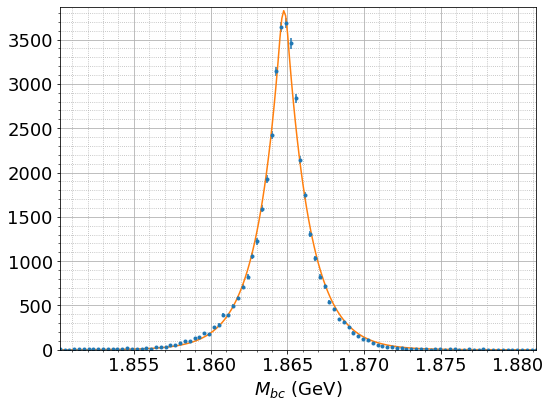

In [32]:
fit_plot(pdf4, fitres4.x, df.Mbc, xlabel=r'$M_{bc}$ (GeV)');
plt.savefig('plots/mbc_dngamgam.png')